In [0]:
from fastai.vision import *
from fastai.imports import *
import imageio

In [8]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2019-03-22 20:52:42--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz.2’

images.tar.gz.2     100%[===================>] 755.23M  30.1MB/s    in 26s     

2019-03-22 20:53:08 (29.2 MB/s) - ‘images.tar.gz.2’ saved [791918971/791918971]



In [0]:
!tar -xf images.tar.gz

In [4]:
!ls images | head -4

Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
Abyssinian_101.mat


In [5]:
!ls images -1 | wc -l

7393


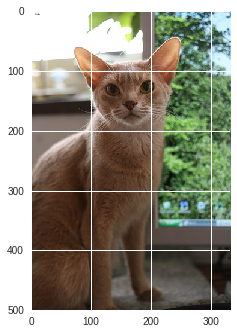

In [9]:
plt.imshow(imageio.imread("./images/Abyssinian_116.jpg"))
plt.show()

In [0]:
pat = r'/([^/]+)_\d+.jpg$'
bs = 64

In [0]:
data = (ImageList.from_folder("./images")
                .split_by_rand_pct(0.2)
                .label_from_re(pat)
                .transform(get_transforms(), size=224)
                .databunch(bs=bs))

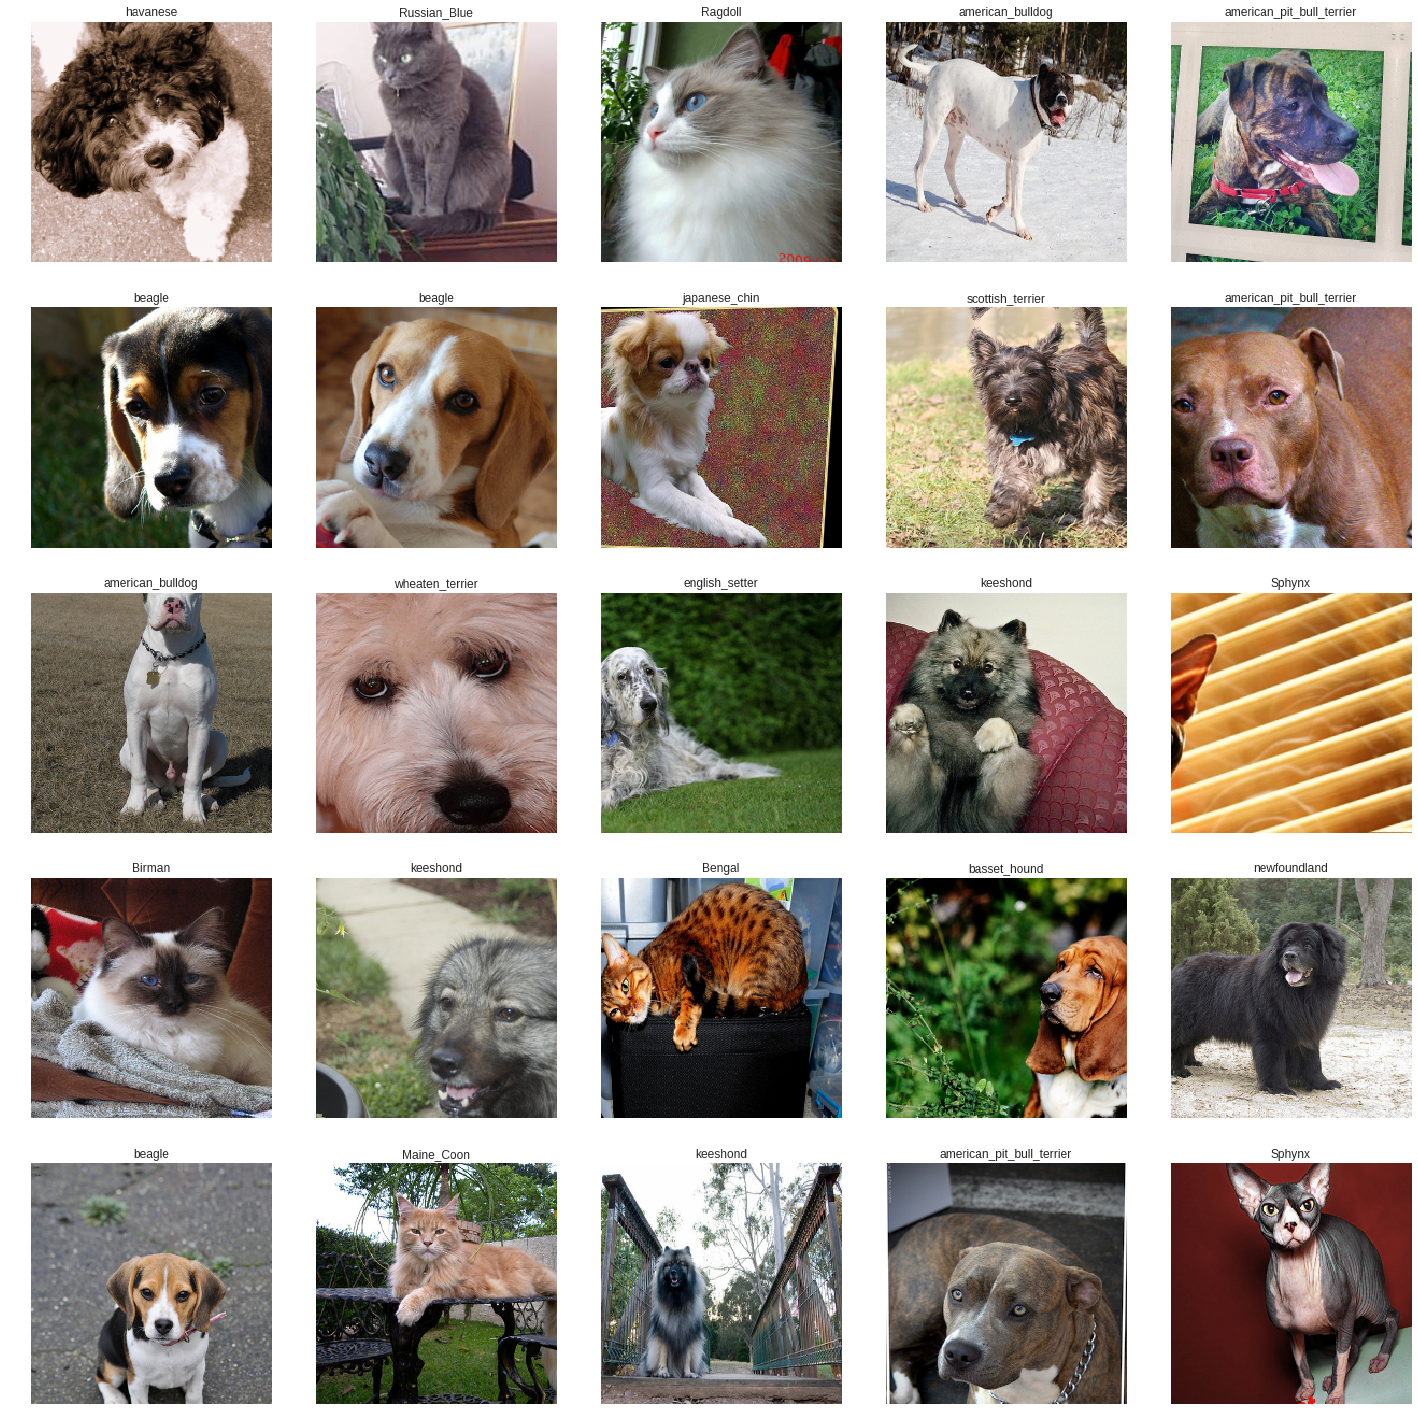

In [12]:
data.show_batch()

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 27885186.59it/s]


In [14]:
learn.fit_one_cycle(3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


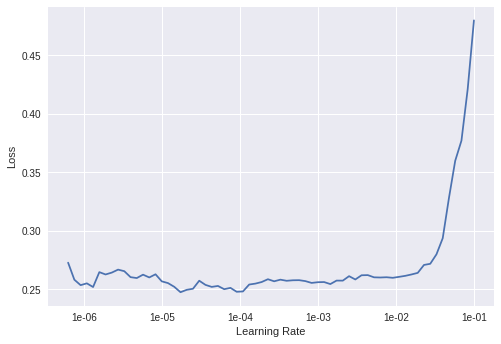

In [15]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("stage-1")

In [17]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(5e-6,  1e-4))

In [0]:
learn.save("stage-2")

In [19]:
learn.validate()

[0.20489138, tensor(0.9310)]

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

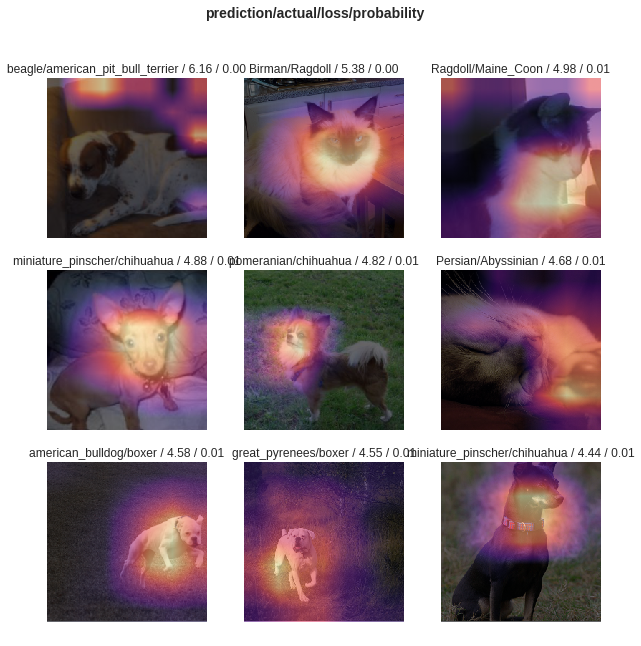

In [21]:
interp.plot_top_losses(9, figsize=(10, 10))

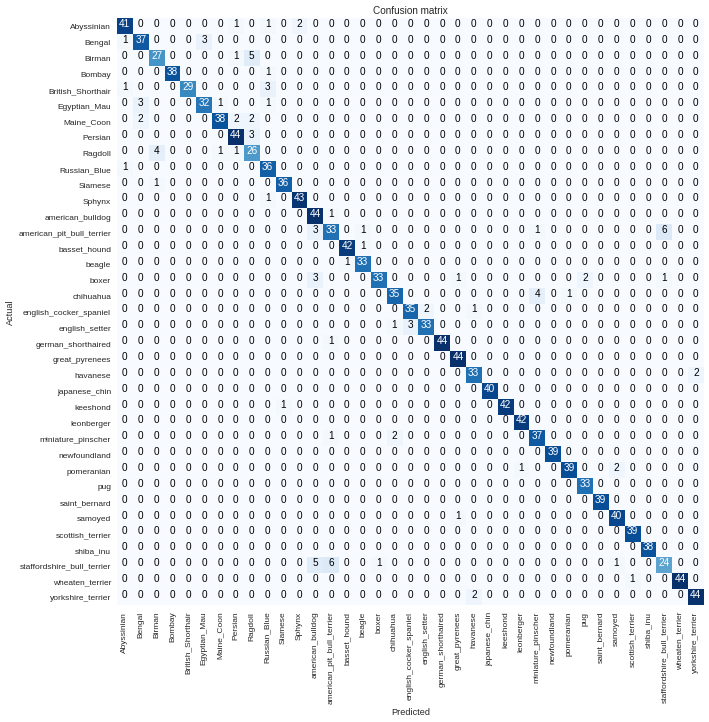

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Birman', 'Ragdoll', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Ragdoll', 'Birman', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('boxer', 'pug', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('pomeranian', 'samoyed', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [0]:
learn.predict(open_image("anni.jpg"))

(Category havanese,
 tensor(22),
 tensor([8.3031e-05, 1.2843e-04, 6.3580e-04, 5.8089e-04, 6.4929e-05, 3.1831e-05,
         9.8975e-05, 2.0869e-03, 8.6722e-05, 7.1440e-05, 4.8491e-04, 4.3406e-05,
         1.9416e-04, 3.8928e-05, 1.5605e-04, 1.5863e-05, 6.5232e-03, 2.8011e-05,
         9.4467e-03, 4.4421e-05, 5.5693e-05, 5.9678e-05, 5.8643e-01, 1.5922e-04,
         1.4750e-03, 2.3107e-03, 5.8210e-04, 2.8147e-04, 7.4141e-05, 1.0456e-03,
         6.5012e-05, 7.5313e-06, 1.2409e-02, 1.9416e-04, 2.2590e-04, 2.4310e-01,
         1.3068e-01]))

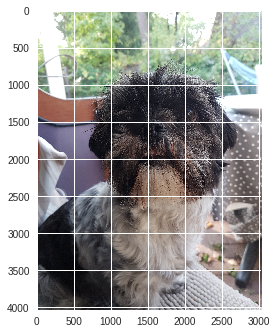

In [0]:
plt.imshow(imageio.imread("anni.jpg"))
plt.show()